# Introduction to Machine Learning and Toolkit Exercises 

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `Iris_Data.csv` found in the [data](../../data) directory.

In [24]:
from __future__ import print_function
import os
data_path = ['data']
print (data_path)

['data']


## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [7]:
import numpy as np
import pandas as pd

filepath = os.sep.join(data_path + ['Iris_Data.csv'])
print(filepath)
data = pd.read_csv(filepath)
data.head()

data\Iris_Data.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Number of rows
print(data.shape[0])

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)


150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [9]:
# The str method maps the following function to each entry as a string
data['species'] = data.species.str.replace('Iris-', '')
# alternatively
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [25]:
#The number of each species present
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [44]:
# The mean
print("sepal_length's mean: {}".format(np.mean(data['sepal_length'])))
print("sepal_width's mean: {}".format(np.mean(data['sepal_width'])))
print("petal_length's mean: {}".format(np.mean(data['petal_length'])))
print("petal_width's mean: {}".format(np.mean(data['petal_width'])))


sepal_length's mean: 5.843333333333335
sepal_width's mean: 3.0540000000000007
petal_length's mean: 3.7586666666666693
petal_width's mean: 1.1986666666666672


In [49]:
#The median
print("sepal_length's median: {}".format(np.median(data['sepal_length'])))
print("sepal_width's median : {}".format(np.median(data['sepal_width'])))
print("pepal_length's median: {}".format(np.median(data['petal_length'])))
print("pepal_width's median: {}".format(np.median(data['petal_width'])))


sepal_length's median: 5.8
sepal_width's median : 3.0
pepal_length's median: 4.35
pepal_width's median: 1.3


In [52]:
# The range
print("sepal_length's range: {}".format(np.max(data['sepal_length']) - np.min(data['sepal_length'])))

print("sepal_width's range: {}".format(np.max(data['sepal_width']) - np.min(data['sepal_width'])))

print("petal_length's range: {}".format(np.max(data['petal_length']) - np.min(data['petal_length'])))

print("petal_width's range: {}".format(np.max(data['petal_width']) - np.min(data['petal_width'])))


sepal_length's range: 3.6000000000000005
sepal_width's range: 2.4000000000000004
petal_length's range: 5.9
petal_width's range: 2.4


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [11]:
# The mean calculation
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [12]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


#### applying multiple functions at once - 2 methods

In [58]:
# 1. Passing a list of recognized strings

data.groupby('species').agg(['mean', 'median', 'sum'])  


sepal_length               sepal_width               petal_length  \
                   mean median    sum        mean median    sum         mean   
species                                                                        
setosa            5.006    5.0  250.3       3.418    3.4  170.9        1.464   
versicolor        5.936    5.9  296.8       2.770    2.8  138.5        4.260   
virginica         6.588    6.5  329.4       2.974    3.0  148.7        5.552   

                         petal_width                
           median    sum        mean median    sum  
species                                             
setosa       1.50   73.2       0.244    0.2   12.2  
versicolor   4.35  213.0       1.326    1.3   66.3  
virginica    5.55  277.6       2.026    2.0  101.3

In [60]:
# 2. Passing a list of explicit aggregation functions
data.groupby('species').agg([np.mean, np.median, np.sum])  

sepal_length               sepal_width               petal_length  \
                   mean median    sum        mean median    sum         mean   
species                                                                        
setosa            5.006    5.0  250.3       3.418    3.4  170.9        1.464   
versicolor        5.936    5.9  296.8       2.770    2.8  138.5        4.260   
virginica         6.588    6.5  329.4       2.974    3.0  148.7        5.552   

                         petal_width                
           median    sum        mean median    sum  
species                                             
setosa       1.50   73.2       0.244    0.2   12.2  
versicolor   4.35  213.0       1.326    1.3   66.3  
virginica    5.55  277.6       2.026    2.0  101.3

In [73]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint
agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
#print(agg_dict)
pprint(agg_dict)
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': ['mean', 'median'],
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}
{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

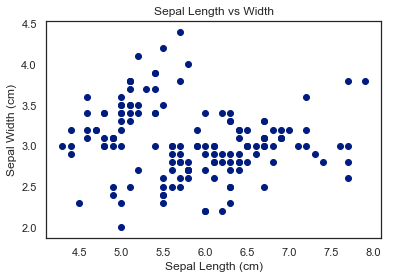

In [96]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

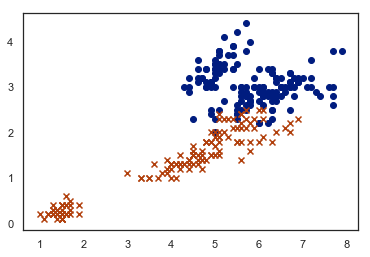

In [99]:
# Plot sepal and petal in the same figure
# sepal is marked with o while petal is marked with x
plt.scatter(data.sepal_length, data.sepal_width, marker='o', label='sepal')
         
plt.scatter(data.petal_length, data.petal_width, marker='x', label='petal')

plt.show()

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

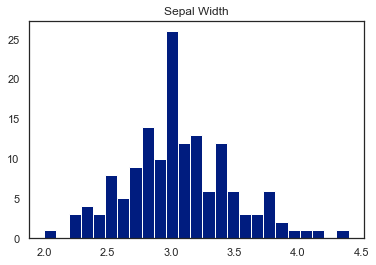

In [136]:
plt.hist(data['sepal_width'], bins= 25, label='sepal width histogram')
plt.title('Sepal Width')
plt.show()

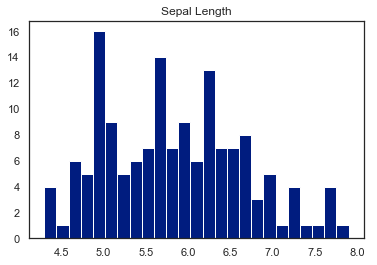

7.9
4.3


In [137]:
plt.hist(data['sepal_length'], bins= 25, label='sepal length histogram')
plt.title('Sepal Length')
plt.show()

print(np.max(data['sepal_length']))
print(np.min(data['sepal_length']))




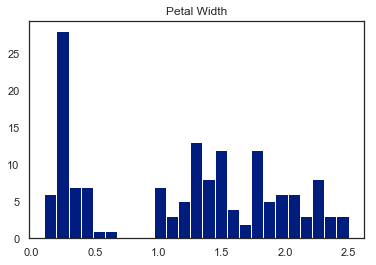

0.1
2.5


In [156]:
plt.hist(data['petal_width'], bins= 25, label='petal width histogram')
plt.title('Petal Width')
plt.show()

print(min(data['petal_width']))
print(max(data['petal_width']))

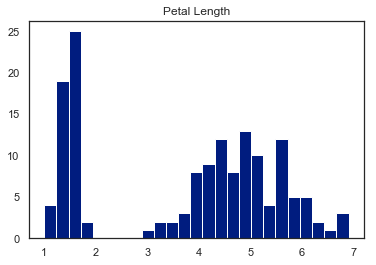

6.9


In [157]:
plt.hist(data['petal_length'], bins=25, label='petal length histogram')
plt.title('Petal Length')
plt.show()

print(np.max(data['petal_length']))


## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

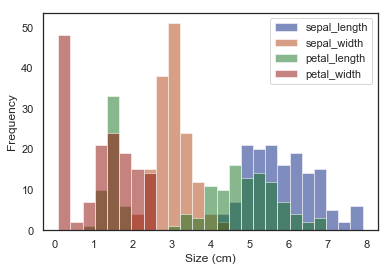

In [145]:
import seaborn as sns

sns.set_context('notebook')

# This uses the `.plot.hist` method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

<Figure size 1440x720 with 0 Axes>

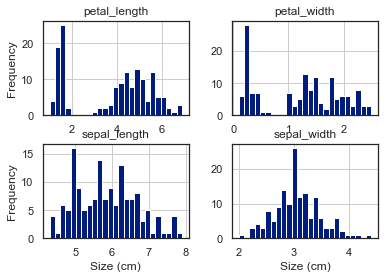

In [168]:
# To create four separate plots, use Pandas `.hist` method
axList = data.hist(bins=25)

#pprint(axList)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')


## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

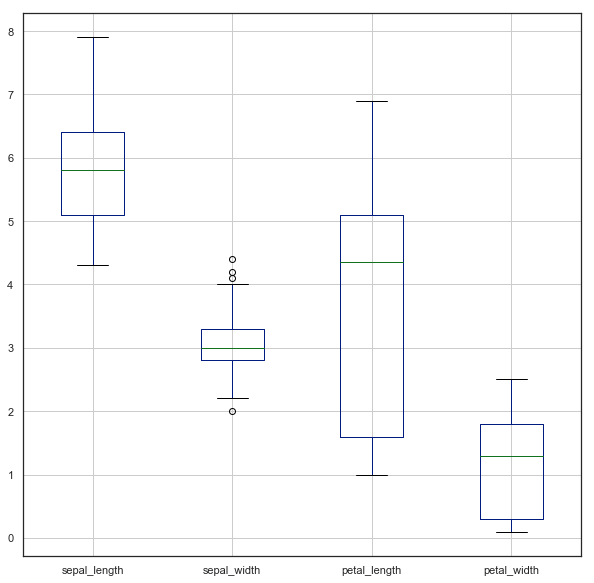

In [164]:
plt.figure(figsize=(10,10))
data.boxplot()
plt.show()

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [176]:
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


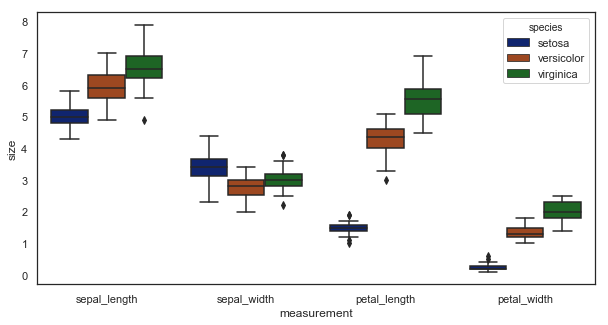

In [177]:
# Now plot the dataframe from above using Seaborn

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(10,5))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

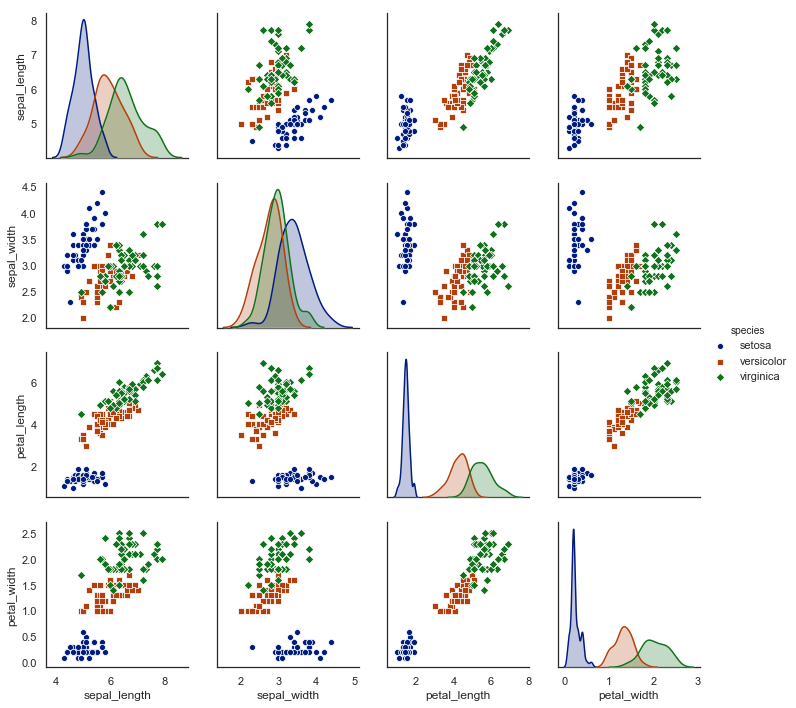

In [182]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')
sns.pairplot(data, hue="species", markers=["o", "s", "D"])
plt.show()